# <span style="color:black;">Importation des Bibliothèques et Préparation des Outils pour l'Analyse
</span>


In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# <span style="color:black;">Préparation et Prétraitement des Données pour la Détection de Fraude
</span>


## <span style="color:black;">Chargement des datasets</span>


In [4]:
df_train = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv')
df_test = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTest.csv')

## <span style="color:black;">Suppression des colonnes inutiles</span>


In [5]:

# Suppression des colonnes inutiles
df_train.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)


## <span style="color:black;">Conversion et Encodage des Colonnes</span>


In [6]:

# Conversion des colonnes de dates en timestamps
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']).apply(lambda x: x.timestamp())
df_train['dob'] = pd.to_datetime(df_train['dob']).apply(lambda x: x.timestamp())



In [7]:

# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [ 'category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_train[col] = encoder.fit_transform(df_train[col])



In [8]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_test[col] = encoder.fit_transform(df_test[col])



In [9]:

# The rest of your numeric columns should already be in the correct format

df_test ['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test ['trans_date_trans_time'] = df_test ['trans_date_trans_time'].apply(lambda x: x.timestamp())



## <span style="color:black;">Séparation des features et de la target</span>


In [10]:
# Séparation des features et de la target
X = df_train .drop(columns=['is_fraud'])
Y = df_train ['is_fraud']


## <span style="color:black;">Normalisation des features</span>


In [11]:
scaler = StandardScaler()
X= scaler.fit_transform(X)


## <span style="color:black;">Séparation des données en train et test</span>


In [12]:
# Séparation des données en train et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# <span style="color:black;">Entraînement du Modèle de SVM [Sans / Avec] SMOTE</span>


## <span style="color:black;">Sans SMOTE</span>

In [13]:
# Initialiser le modèle Naive Bayes
naive_bayes = GaussianNB()

In [14]:
# Entraîner le modèle Naive Bayes sans SMOTE
naive_bayes.fit(X_train, Y_train)

GaussianNB()

In [15]:
# Prédire sur les données de test
y_pred_bayes = naive_bayes.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle de Bayes</span>


In [16]:
# Calculer l'accuracy
accuracy_without_smote_bayes = accuracy_score(Y_test, y_pred_bayes)

# Obtenir le rapport de classification sous forme de dictionnaire
report_without_smote_bayes = classification_report(Y_test, y_pred_bayes, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_without_smote_bayes = pd.DataFrame(report_without_smote_bayes).transpose()

# Ajouter l'accuracy au DataFrame
accuracy_df_without_smote_bayes = pd.DataFrame({'precision': [accuracy_without_smote_bayes], 'recall': [accuracy_without_smote_bayes], 'f1-score': [accuracy_without_smote_bayes], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote_bayes = pd.concat([report_df_without_smote_bayes.loc[['0', '1']], accuracy_df_without_smote_bayes])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle Naive Bayes sans SMOTE")
print(report_df_without_smote_bayes)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_without_smote_bayes = report_without_smote_bayes['0']['f1-score']
f1_score_class_1_without_smote_bayes = report_without_smote_bayes['1']['f1-score']

# Afficher les F1-scores
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote_bayes:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote_bayes:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_without_smote_bayes = f1_score(Y_test, y_pred_bayes, average='macro')
f1_micro_without_smote_bayes = f1_score(Y_test, y_pred_bayes, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote_bayes:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote_bayes:.4f}")


Modèle Naive Bayes sans SMOTE
          precision    recall  f1-score   support
0          0.996870  0.992984  0.994923  257834.0
1          0.278132  0.464357  0.347891    1501.0
accuracy   0.989924  0.989924  0.989924  259335.0

F1-Score (classe 0): 0.9949
F1-Score (classe 1): 0.3479

F1-Score (macro): 0.6714
F1-Score (micro): 0.9899


## <span style="color:black;">Avec SMOTE</span>

In [17]:
# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [18]:
# Initialiser le modèle Naive Bayes
naive_bayes_smote = GaussianNB()

In [19]:
# Entraîner le modèle Naive Bayes avec SMOTE
naive_bayes_smote.fit(X_train_smote, Y_train_smote)

GaussianNB()

In [20]:
# Prédire sur les données de test avec SMOTE
y_pred_bayes_smote = naive_bayes_smote.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle de Bayes</span>


In [21]:
# Calculer l'accuracy
accuracy_with_smote_bayes = accuracy_score(Y_test, y_pred_bayes_smote)

# Obtenir le rapport de classification sous forme de dictionnaire
report_with_smote_bayes = classification_report(Y_test, y_pred_bayes_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame
report_df_with_smote_bayes = pd.DataFrame(report_with_smote_bayes).transpose()

# Ajouter l'accuracy au DataFrame
accuracy_df_with_smote_bayes = pd.DataFrame({'precision': [accuracy_with_smote_bayes], 'recall': [accuracy_with_smote_bayes], 'f1-score': [accuracy_with_smote_bayes], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_with_smote_bayes = pd.concat([report_df_with_smote_bayes.loc[['0', '1']], accuracy_df_with_smote_bayes])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle Naive Bayes avec SMOTE")
print(report_df_with_smote_bayes)

# Extraire les F1-scores pour les classes 0 et 1
f1_score_class_0_with_smote_bayes = report_with_smote_bayes['0']['f1-score']
f1_score_class_1_with_smote_bayes = report_with_smote_bayes['1']['f1-score']

# Afficher les F1-scores
print(f"\nF1-Score (classe 0): {f1_score_class_0_with_smote_bayes:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_with_smote_bayes:.4f}")

# Calculer le F1-score global (moyenne macro ou micro)
f1_macro_with_smote_bayes = f1_score(Y_test, y_pred_bayes_smote, average='macro')
f1_micro_with_smote_bayes = f1_score(Y_test, y_pred_bayes_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_with_smote_bayes:.4f}")
print(f"F1-Score (micro): {f1_micro_with_smote_bayes:.4f}")


Modèle Naive Bayes avec SMOTE
          precision    recall  f1-score   support
0          0.997737  0.971338  0.984361  257834.0
1          0.112099  0.621586  0.189943    1501.0
accuracy   0.969314  0.969314  0.969314  259335.0

F1-Score (classe 0): 0.9844
F1-Score (classe 1): 0.1899

F1-Score (macro): 0.5872
F1-Score (micro): 0.9693


# <span style="color:black;">Evaluation du Modèle de Régression Logistique [Sans / Avec] SMOTE</span>


## <span style="color:black;">Évaluation des Modèles : Courbes ROC avec et sans SMOTE</span>


In [2]:
from sklearn.metrics import roc_curve, auc

# Obtenir les probabilités de prédiction pour les données de test
y_prob_bayes = naive_bayes.predict_proba(X_test)[:, 1]
y_prob_bayes_smote = naive_bayes_smote.predict_proba(X_test)[:, 1]

# Calculer les courbes ROC
fpr_bayes, tpr_bayes, _ = roc_curve(Y_test, y_prob_bayes)
fpr_bayes_smote, tpr_bayes_smote, _ = roc_curve(Y_test, y_prob_bayes_smote)

# Calculer l'aire sous la courbe (AUC)
auc_bayes = auc(fpr_bayes, tpr_bayes)
auc_bayes_smote = auc(fpr_bayes_smote, tpr_bayes_smote)

# Tracer les courbes ROC
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Courbe ROC sans SMOTE
axes[0].plot(fpr_bayes, tpr_bayes, color='blue', label=f'Naive Bayes (AUC = {auc_bayes:.2f})')
axes[0].plot([0, 1], [0, 1], 'k--', label='Référence')
axes[0].set_title('Courbe ROC - Naive Bayes sans SMOTE')
axes[0].set_xlabel('Taux de Faux Positifs')
axes[0].set_ylabel('Taux de Vrais Positifs')
axes[0].legend()

# Courbe ROC avec SMOTE
axes[1].plot(fpr_bayes_smote, tpr_bayes_smote, color='red', label=f'Naive Bayes avec SMOTE (AUC = {auc_bayes_smote:.2f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='Référence')
axes[1].set_title('Courbe ROC - Naive Bayes avec SMOTE')
axes[1].set_xlabel('Taux de Faux Positifs')
axes[1].set_ylabel('Taux de Vrais Positifs')
axes[1].legend()

plt.tight_layout()
plt.show()


NameError: name 'naive_bayes' is not defined

## <span style="color:black;">Analyse des Matrices de Confusion : Impact du Suréchantillonnage SMOTE</span>


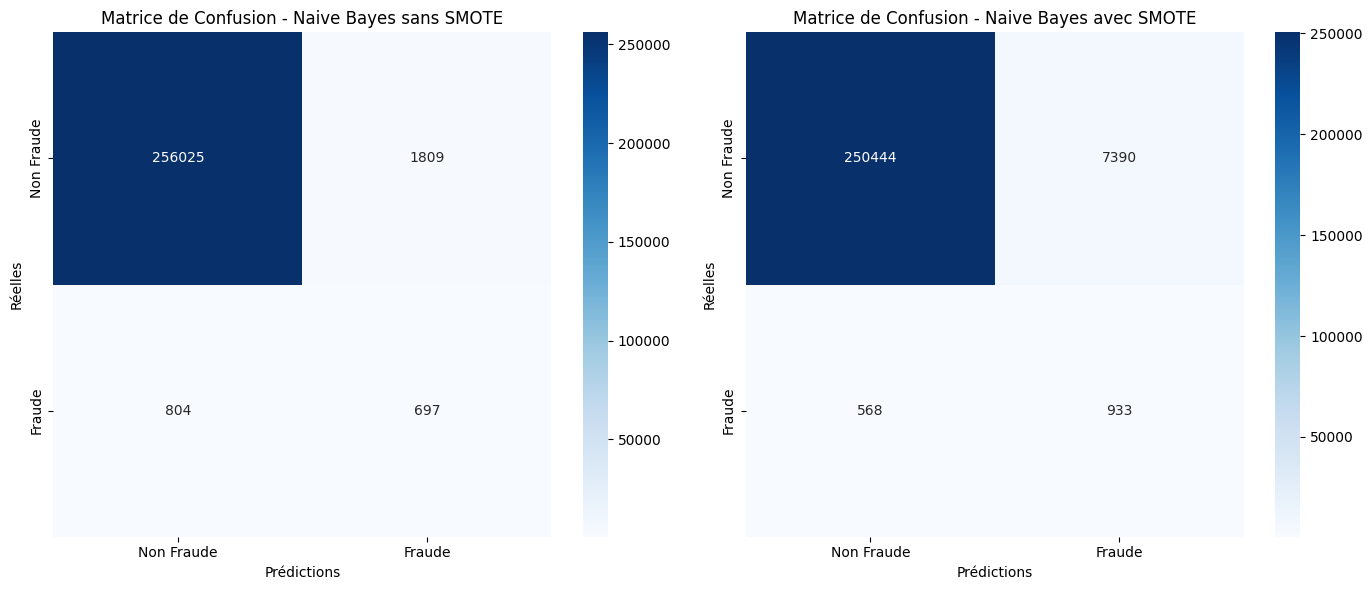

In [23]:
from sklearn.metrics import confusion_matrix

# Calculer les matrices de confusion
cm_bayes = confusion_matrix(Y_test, y_pred_bayes)
cm_bayes_smote = confusion_matrix(Y_test, y_pred_bayes_smote)

# Tracer les matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Matrice de confusion sans SMOTE
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Non Fraude', 'Fraude'], yticklabels=['Non Fraude', 'Fraude'])
axes[0].set_title('Matrice de Confusion - Naive Bayes sans SMOTE')
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Réelles')

# Matrice de confusion avec SMOTE
sns.heatmap(cm_bayes_smote, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Non Fraude', 'Fraude'], yticklabels=['Non Fraude', 'Fraude'])
axes[1].set_title('Matrice de Confusion - Naive Bayes avec SMOTE')
axes[1].set_xlabel('Prédictions')
axes[1].set_ylabel('Réelles')

plt.tight_layout()
plt.show()


## <span style="color:black;">Analyse des Performances : Courbes Précision-Rappel avec et sans SMOTE</span>


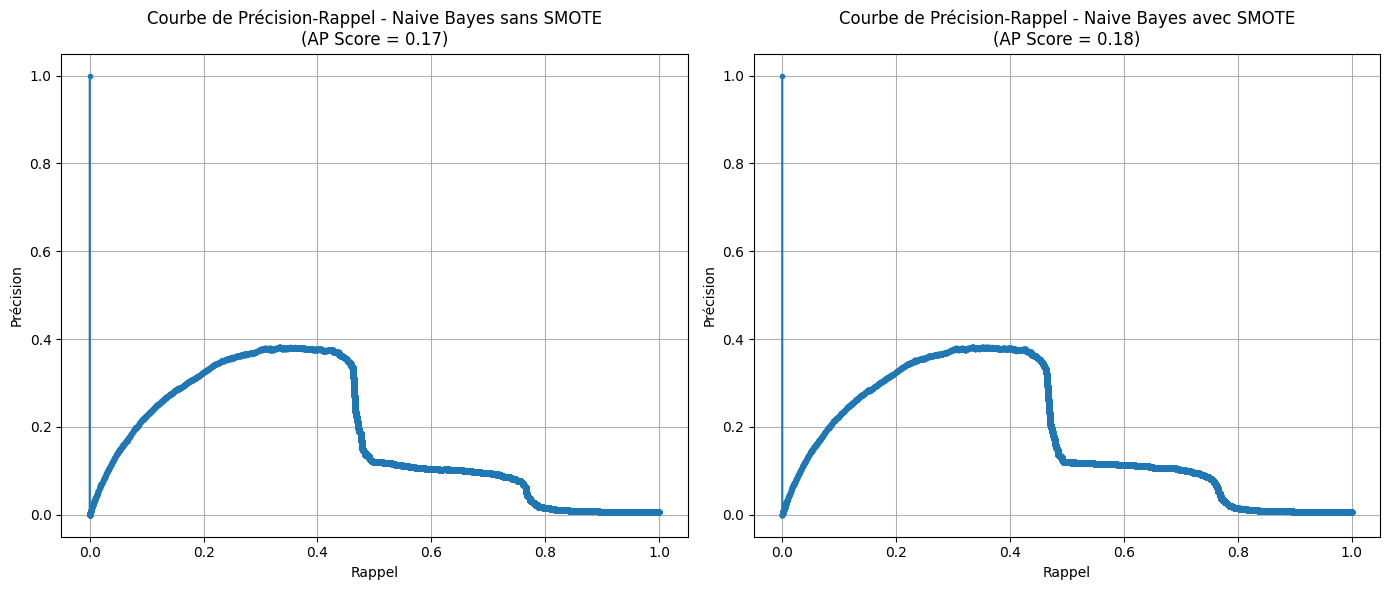

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculer les courbes de précision-rappel
precision_bayes, recall_bayes, _ = precision_recall_curve(Y_test, y_prob_bayes)
precision_bayes_smote, recall_bayes_smote, _ = precision_recall_curve(Y_test, y_prob_bayes_smote)

# Calculer le score moyen de précision
avg_precision_bayes = average_precision_score(Y_test, y_prob_bayes)
avg_precision_bayes_smote = average_precision_score(Y_test, y_prob_bayes_smote)

# Tracer les courbes de précision-rappel
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Courbe de précision-rappel sans SMOTE
axes[0].plot(recall_bayes, precision_bayes, marker='.')
axes[0].set_title(f'Courbe de Précision-Rappel - Naive Bayes sans SMOTE\n(AP Score = {avg_precision_bayes:.2f})')
axes[0].set_xlabel('Rappel')
axes[0].set_ylabel('Précision')
axes[0].grid(True)

# Courbe de précision-rappel avec SMOTE
axes[1].plot(recall_bayes_smote, precision_bayes_smote, marker='.')
axes[1].set_title(f'Courbe de Précision-Rappel - Naive Bayes avec SMOTE\n(AP Score = {avg_precision_bayes_smote:.2f})')
axes[1].set_xlabel('Rappel')
axes[1].set_ylabel('Précision')
axes[1].grid(True)

plt.tight_layout()
plt.show()


## <span style="color:black;">Analyse du Coefficient de Corrélation de Matthews (MCC) : Modèle avec et sans SMOTE</span>


In [1]:
from sklearn.metrics import matthews_corrcoef

# Calculer le MCC pour le modèle sans SMOTE
mcc_bayes = matthews_corrcoef(Y_test, y_pred_bayes)

# Calculer le MCC pour le modèle avec SMOTE
mcc_bayes_smote = matthews_corrcoef(Y_test, y_pred_bayes_smote)

# Préparer les données pour le graphique
labels = ['Sans SMOTE', 'Avec SMOTE']
mcc_scores = [mcc_bayes, mcc_bayes_smote]

# Tracer les résultats du MCC
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(labels, mcc_scores, color=['blue', 'green'])
ax.set_title('Analyse du Coefficient de Corrélation de Matthews (MCC)')
ax.set_xlabel('Modèle')
ax.set_ylabel('MCC')
ax.grid(axis='y')

plt.show()


print(f"MCC sans SMOTE: {mcc_bayes:.4f}")
print(f"MCC avec SMOTE: {mcc_bayes_smote:.4f}")


NameError: name 'Y_test' is not defined

## <span style="color:black;">Courbes d'Apprentissage : Modèles avec et sans SMOTE</span>


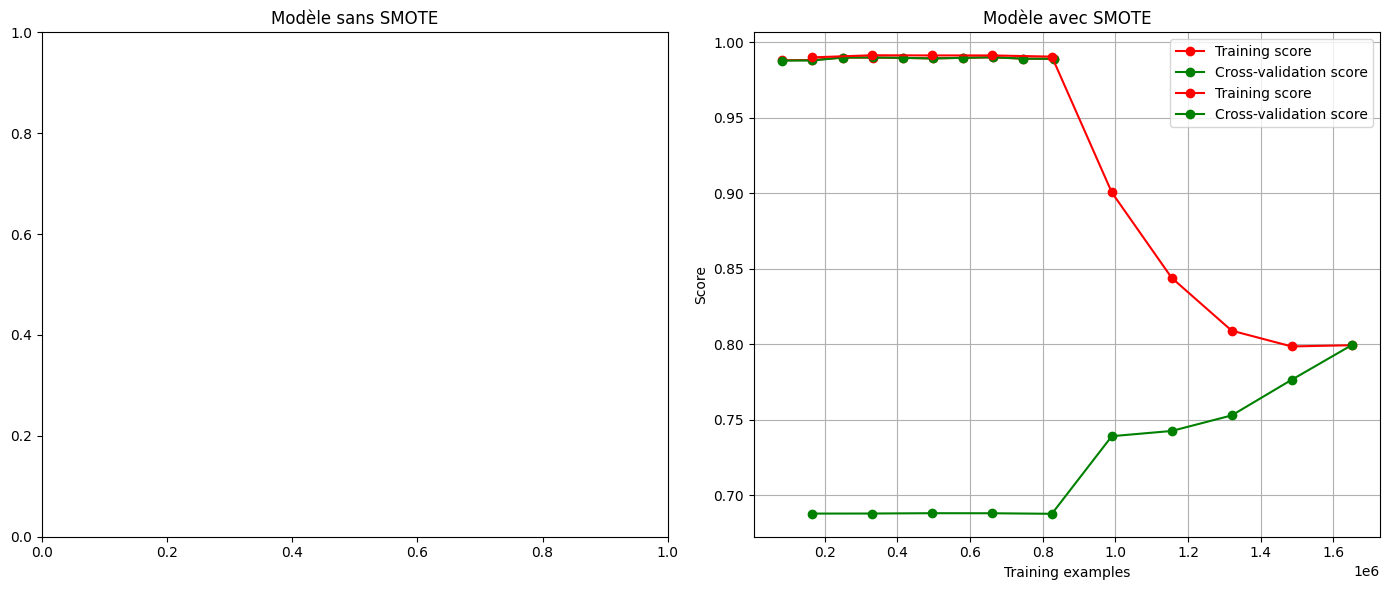

In [26]:
from sklearn.model_selection import learning_curve

# Fonction pour tracer les courbes d'apprentissage
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)

# Courbes d'apprentissage pour le modèle sans SMOTE
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Modèle sans SMOTE
plot_learning_curve(naive_bayes, X_train, Y_train, 'Courbe d\'apprentissage - Sans SMOTE')
axs[0].set_title('Modèle sans SMOTE')

# Modèle avec SMOTE
plot_learning_curve(naive_bayes_smote, X_train_smote, Y_train_smote, 'Courbe d\'apprentissage - Avec SMOTE')
axs[1].set_title('Modèle avec SMOTE')

plt.tight_layout()
plt.show()


## <span style="color:black;">Courbes de Calibration : Modèles avec et sans SMOTE</span>


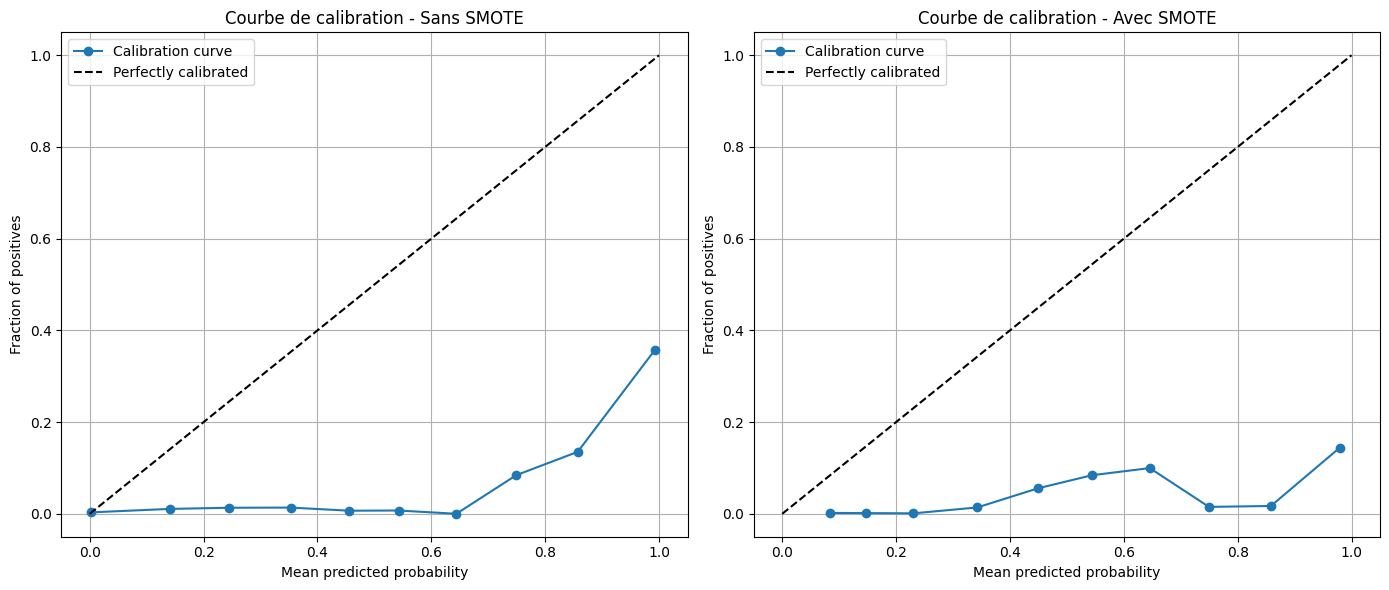

In [27]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

# Fonction pour tracer les courbes de calibration
def plot_calibration_curve(y_true, y_prob, ax, title):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_prob, n_bins=10)
    ax.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Calibration curve')
    ax.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    ax.set_xlabel('Mean predicted probability')
    ax.set_ylabel('Fraction of positives')
    ax.set_title(title)
    ax.legend(loc='best')
    ax.grid(True)


# Tracer les courbes de calibration
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Courbe de calibration pour le modèle sans SMOTE
plot_calibration_curve(Y_test, y_prob_bayes, axs[0], 'Courbe de calibration - Sans SMOTE')

# Courbe de calibration pour le modèle avec SMOTE
plot_calibration_curve(Y_test, y_prob_bayes_smote, axs[1], 'Courbe de calibration - Avec SMOTE')

plt.tight_layout()
plt.show()
